# Dataset Download

In [106]:
!pip install kaggle==1.5.12

In [107]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [108]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip titanic.zip

# Data Preparation and Cleaning

In [110]:
import pandas as pd
df = pd.read_csv('train.csv')

In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


performing knn imputation , here removal of independent variables that doesn,t help in knn impuation is performed

In [114]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

In [115]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [116]:
cat_var = df[['Sex','Embarked']]
cat_dummies = pd.get_dummies(cat_var,drop_first=True)
cat_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,True,False,True
1,False,False,False
2,False,False,True
3,False,False,True
4,True,False,True


In [117]:
df = df.drop(['Sex','Embarked'],axis = 1)
df = pd.concat([df,cat_dummies],axis = 1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [118]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [119]:
df.isna().any()

,0
Survived,False
Pclass,False
Age,False
SibSp,False
Parch,False
Fare,False
Sex_male,False
Embarked_Q,False
Embarked_S,False


In [120]:
fare_mean = df['Fare'].mean()
fare_std = df['Fare'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
fare_outliers = df[(df['Fare'] < low) | (df['Fare'] > high)]
fare_outliers.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
27,0.0,1.0,19.0,3.0,2.0,263.0000,1.0,0.0,1.0
88,1.0,1.0,23.0,3.0,2.0,263.0000,0.0,0.0,1.0
118,0.0,1.0,24.0,0.0,1.0,247.5208,1.0,0.0,0.0
258,1.0,1.0,35.0,0.0,0.0,512.3292,0.0,0.0,0.0
299,1.0,1.0,50.0,0.0,1.0,247.5208,0.0,0.0,0.0


In [121]:
import numpy as np
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Fare']=np.where(df['Fare']>upper_whisker,upper_whisker,np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare']))

<Axes: ylabel='Fare'>

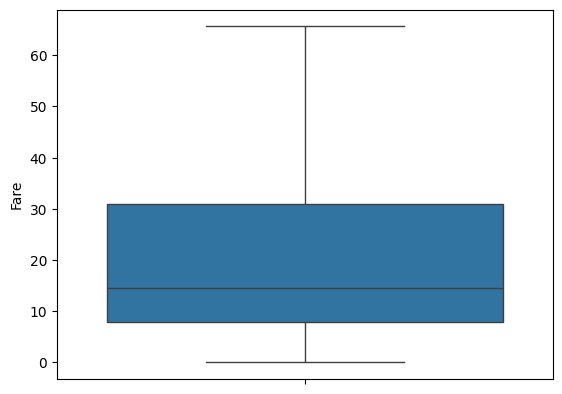

In [122]:
import seaborn as sns
sns.boxplot(df['Fare'])

In [123]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [124]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [125]:
model = DecisionTreeClassifier()
model.fit(X, y)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

In [126]:
scores = cross_val_score(model, X, y, cv=kfold)

print("Scores for each fold:", scores)
print("Average Accuracy:", scores.mean())

Scores for each fold: [0.74439462 0.81165919 0.74439462 0.76126126]
Average Accuracy: 0.7654274229386338


# Testing the model

In [127]:
test = pd.read_csv('test.csv')

In [128]:
cat_var = test[['Sex','Embarked']]
cat_dummies = pd.get_dummies(cat_var,drop_first=True)
cat_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,True,True,False
1,False,False,True
2,True,True,False
3,True,False,True
4,False,False,True


In [129]:
test = test.drop(['Sex','Embarked'],axis = 1)
test = pd.concat([test,cat_dummies],axis = 1)
test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,True,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,False,False,True


In [131]:
test= test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [132]:
y_pred = model.predict(test)

In [133]:
test_df = pd.read_csv('test.csv')
passenger_ids = test_df['PassengerId']

In [134]:
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_pred
})

In [135]:
submission_df.to_csv('submission.csv', index=False)